In [96]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix,classification_report,roc_auc_score,accuracy_score,recall_score,precision_score,f1_score)

In [3]:
df = pd.read_csv("User_Data.csv")

In [8]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [51]:
dummies = pd.get_dummies(df["Gender"],dtype=int)
dataWithoutFeatures = df.drop("Gender",axis=1)
dataWithoutFeatures = dataWithoutFeatures.drop("User ID",axis=1)
dataWithoutFeatures = pd.concat([dataWithoutFeatures,dummies],axis=1)
print(dataWithoutFeatures)

     Age  EstimatedSalary  Purchased  Female  Male
0     19            19000          0       0     1
1     35            20000          0       0     1
2     26            43000          0       1     0
3     27            57000          0       1     0
4     19            76000          0       0     1
..   ...              ...        ...     ...   ...
395   46            41000          1       1     0
396   51            23000          1       0     1
397   50            20000          1       1     0
398   36            33000          0       0     1
399   49            36000          1       1     0

[400 rows x 5 columns]


<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

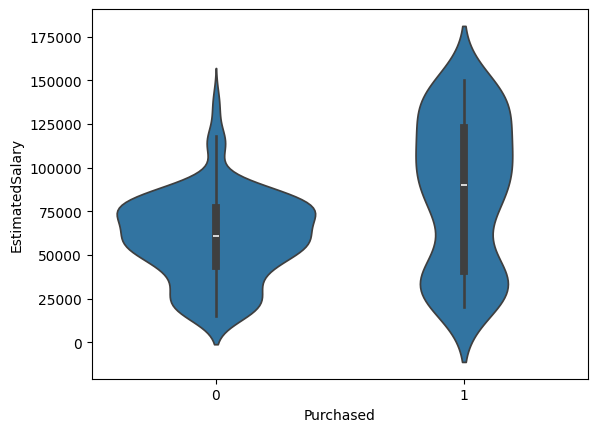

In [45]:
sns.violinplot(x='Purchased', y='EstimatedSalary', data=dataWithoutFeatures)

<Axes: xlabel='Purchased', ylabel='Age'>

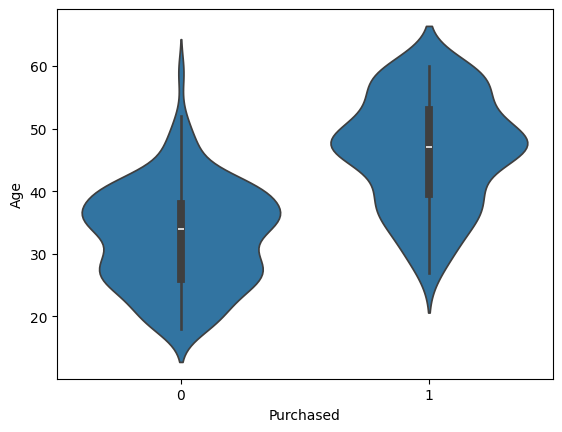

In [44]:
sns.violinplot(x='Purchased', y='Age', data=dataWithoutFeatures)

In [53]:
features = dataWithoutFeatures.drop("Purchased", axis=1)
target = dataWithoutFeatures["Purchased"]
print(target,features)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(features,target)

In [90]:
lr = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()

In [91]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
gnb.fit(X_train,y_train)

GaussianNB()

In [93]:
lrMetrics = lr.predict(X_test)
knnMetrics = knn.predict(X_test)
gnbMetrics = gnb.predict(X_test)

In [97]:
print("Logistic Regression Confusion Matrix: ")
print(confusion_matrix(y_test,lrMetrics))
print("\nLogistic Regression Classification report: ")
print(classification_report(y_test,lrMetrics))
print("\nLogistic Regression Accuracy Score: ")
print(accuracy_score(y_test,lrMetrics))
print("\nLogistic Regression precision score: ")
print(precision_score(y_test,lrMetrics))
print("\nLogistic Regression recall score: ")
print(recall_score(y_test,lrMetrics))
print("\nLogistic Regression f1 score: ")
print(f1_score(y_test,lrMetrics))
print("\nLogistic Regression ROC AUC score: ")
print(accuracy_score(y_test,lrMetrics))

Logistic Regression Confusion Matrix: 
[[59  6]
 [ 8 27]]

Logistic Regression Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        65
           1       0.82      0.77      0.79        35

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100


Logistic Regression Accuracy Score: 
0.86

Logistic Regression precision score: 
0.8181818181818182

Logistic Regression recall score: 
0.7714285714285715

Logistic Regression f1 score: 
0.7941176470588235

Logistic Regression ROC AUC score: 
0.86


In [99]:
print("K nearest Neighbours Confusion Matrix: ")
print(confusion_matrix(y_test,knnMetrics))
print("\nK nearest Neighbours Classification report: ")
print(classification_report(y_test,knnMetrics))
print("\nK nearest Neighbours Accuracy Score: ")
print(accuracy_score(y_test,knnMetrics))
print("\nK nearest Neighbours precision score: ")
print(precision_score(y_test,knnMetrics))
print("\nK nearest Neighbours recall score: ")
print(recall_score(y_test,knnMetrics))
print("\nK nearest Neighbours f1 score: ")
print(f1_score(y_test,knnMetrics))
print("\nK nearest Neighbours ROC AUC score: ")
print(accuracy_score(y_test,knnMetrics))

K nearest Neighbours Confusion Matrix: 
[[57  8]
 [12 23]]

K nearest Neighbours Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        65
           1       0.74      0.66      0.70        35

    accuracy                           0.80       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.80      0.80      0.80       100


K nearest Neighbours Accuracy Score: 
0.8

K nearest Neighbours precision score: 
0.7419354838709677

K nearest Neighbours recall score: 
0.6571428571428571

K nearest Neighbours f1 score: 
0.696969696969697

K nearest Neighbours ROC AUC score: 
0.8


In [100]:
print("Gaussian naive bayesian Confusion Matrix: ")
print(confusion_matrix(y_test,gnbMetrics))
print("\nGaussian naive bayesian Classification report: ")
print(classification_report(y_test,gnbMetrics))
print("\nGaussian naive bayesian Accuracy Score: ")
print(accuracy_score(y_test,gnbMetrics))
print("\nGaussian naive bayesian precision score: ")
print(precision_score(y_test,gnbMetrics))
print("\nGaussian naive bayesian recall score: ")
print(recall_score(y_test,gnbMetrics))
print("\nGaussian naive bayesian f1 score: ")
print(f1_score(y_test,gnbMetrics))
print("\nGaussian naive bayesian ROC AUC score: ")
print(accuracy_score(y_test,gnbMetrics))

Gaussian naive bayesian Confusion Matrix: 
[[60  5]
 [ 6 29]]

Gaussian naive bayesian Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.85      0.83      0.84        35

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100


Gaussian naive bayesian Accuracy Score: 
0.89

Gaussian naive bayesian precision score: 
0.8529411764705882

Gaussian naive bayesian recall score: 
0.8285714285714286

Gaussian naive bayesian f1 score: 
0.8405797101449275

Gaussian naive bayesian ROC AUC score: 
0.89
